In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [41]:
train = ImageDataGenerator(rescale= 1/255.0) #divides each pix value by 255
validation = ImageDataGenerator(rescale = 1/255.0)

In [42]:
train_dataset = train.flow_from_directory("C:\\Users\\Ihsan Ullah\\FERS\\Data\\facialexpression\\train\\",
                                            target_size= (48, 48),
                                            batch_size = 7)
                                            #class_mode = "binary")
validation_dataset = validation.flow_from_directory("C:\\Users\\Ihsan Ullah\\FERS\\Data\\facialexpression\\validation\\",
                                            target_size= (48, 48),
                                            batch_size = 7)
                                            #class_mode = "binary")


Found 700 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [43]:
train_dataset.class_indices  #this class convets the class string into numbers, as neural network cannot take strings, so it converts all the classes names into a numerical value

#validation_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [47]:
#train_dataset.classes #Shows the lables assigned to the images of the classes as classes are given values 0, 1 and 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(2,2), activation = "relu", input_shape = (48,48,1)),
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides = 1,),
    #
    tf.keras.layers.Conv2D(32,(2,2), activation = "relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides = 1,),
    #
    tf.keras.layers.Conv2D(64,(2,2), activation = "relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides = 1,),
    ##
    ##
    tf.keras.layers.Conv2D(128,(2,2), activation = "relu"),
#     tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.GlobalAveragePooling2D(),
    
    ##
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512, activation = "relu"),
    ##
    tf.keras.layers.Dense(7, activation = "softmax")])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 47, 47, 16)        80        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 45, 45, 32)        2080      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 43, 43, 64)        8256      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 41, 41, 128)     

In [45]:
# tf.keras.losses.CategoricalCrossentropy(
# from_logits=false, label_smoothing=0,axis=-1, reduction=losses.utils.ReductionV2.AUTO, name = "categorical)crossentropy")

model.compile(loss= tf.keras.losses.categorical_crossentropy,
             optimizer = "adam",
             metrics = ["accuracy"])

In [46]:
model_fit = model.fit( train_dataset,
                     steps_per_epoch = 5,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 4s 651ms/step - loss: 1.9461 - accuracy: 0.1714 - val_loss: 1.9520 - val_accuracy: 0.1429
Epoch 2/30
5/5 [==============================] - 2s 551ms/step - loss: 1.9341 - accuracy: 0.2571 - val_loss: 1.9700 - val_accuracy: 0.1429
Epoch 3/30
5/5 [==============================] - 2s 562ms/step - loss: 1.9551 - accuracy: 0.1429 - val_loss: 1.9628 - val_accuracy: 0.1429
Epoch 4/30
5/5 [==============================] - 2s 510ms/step - loss: 1.9538 - accuracy: 0.1143 - val_loss: 1.9553 - val_accuracy: 0.1429
Epoch 5/30
5/5 [==============================] - 2s 516ms/step - loss: 1.9553 - accuracy: 0.1714 - val_loss: 1.9518 - val_accuracy: 0.1429
Epoch 6/30
5/5 [==============================] - 2s 501ms/step - loss: 1.9351 - accuracy: 0.2000 - val_loss: 1.9496 - val_accuracy: 0.1429
Epoch 7/30
5/5 [==============================] - 2s 551ms/step - loss: 1.9613 - accuracy: 0.0857 - val_loss: 1.9480 - val_accuracy: 0.1429
Epoch 8/30
5/5 [====

In [31]:
import cv2
from PIL import Image
import os
import glob
import shutil

cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "test_image_{}.png".format(img_counter) 
        path = 'C:\\Users\\Ihsan Ullah\\FERS\\Data\\facialexpression\\test\\'
        cv2.imwrite(os.path.join(path , img_name), frame)
#         shutil.move("C:\\Users\\Ihsan Ullah\\FRS\\FRS via Data Generator\\" , "C:\\Users\\Ihsan Ullah\\FRS\\FRS via Data Generator\\basedata\\Uni Class\\testing\\ihsan\\")
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv2.destroyAllWindows()



Escape hit, closing...


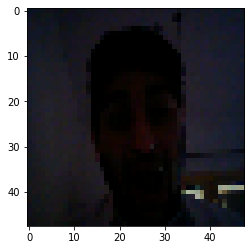

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [32]:
dir_path = "C:\\Users\\Ihsan Ullah\\FERS\\Data\\facialexpression\\test\\"
for i in os.listdir(dir_path):
    img= image.load_img(dir_path +"\\" + i, target_size = (48,48))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)#converts those images from testing dataset to array
    X = np.expand_dims(X, axis = 0)#datagenerator is not provided here so for an aditional dimention here, expandDimention
    images = np.vstack([X])#to vertical join multiple images
    val = model.predict(images)#images are passed to model to predic which image belongs to which class
    
    if val == 0:# if the  image in testing dataset belongs to value class 0 
        print("angry")
    elif val == 1:
        print("disust")
    elif val == 2:
        print("fear")
    elif val == 3:
        print("happy")
    elif val == 4:
        print("neutral")
    elif val == 5:
        print("sad")
    else:
        print("neutral")
    
    